# THE SPARKS FOUNDATION
Data science and Business Analystics 

##### Task 1 : Prediction using Supervised ML
To Predict the percentage of an student based on the number of hours studied

-- Ahmed Patel

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [70]:
df.shape

(25, 2)

In [52]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data  visualization

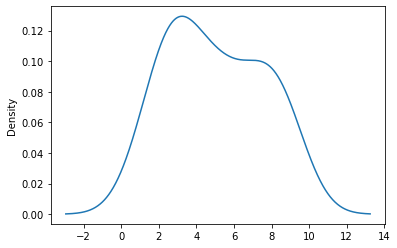

In [54]:
df['Hours'].plot.kde();

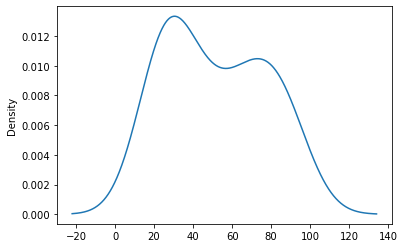

In [55]:
df['Scores'].plot.kde();

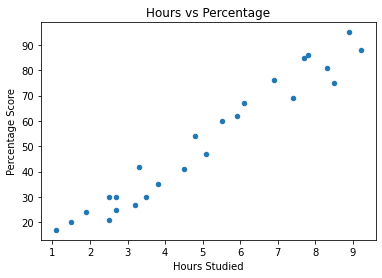

In [56]:
df.plot.scatter(x='Hours', y='Scores') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph it is observed that there is a positive linear relation between the number of hours studied and percentage of score

### Data Preparation

In [34]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values 

In [37]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

### Training the Algorithm

In [57]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X,Y) 
print("Training complete.")

Training complete.


In [58]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [59]:
# Intercept and Slope of the Regression Line
print(regressor.intercept_)
print(regressor.coef_)

2.48367340537321
[9.77580339]


### Plotting the Regression line

In [60]:
line = regressor.coef_*X+regressor.intercept_
line

array([[26.92318188],
       [52.3402707 ],
       [33.76624426],
       [85.57800223],
       [36.69898527],
       [17.14737849],
       [92.4210646 ],
       [56.25059205],
       [83.62284155],
       [28.87834256],
       [77.75735951],
       [60.16091341],
       [46.47478866],
       [34.74382459],
       [13.23705714],
       [89.48832358],
       [26.92318188],
       [21.05769985],
       [62.11607409],
       [74.8246185 ],
       [28.87834256],
       [49.40752968],
       [39.63172629],
       [69.9367168 ],
       [78.73493985]])

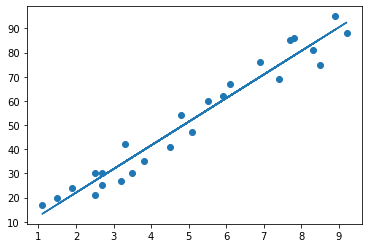

In [61]:
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [62]:
print(X_test)
y_pred = regressor.predict(X_test) 
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [63]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


### What will be the predicted score of a Student if he/she studies for 9.25 hrs/day?

In [67]:
hours = [[9.25]]
pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.9098547701573


### Evaluating the model

In [68]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.071877793635605
